# Likelihood(MLE와 MAP)

베이지안 머신 러닝 모델의 prior, posterior, likelihood 개념을 학습하고 MLE(최대 가능도 추론)와 MAP(최대 사후 확률 추정)의 최적해를 구하는 과정과 두 방법의 차이를 이해한다.

## 목차

- 들어가며: 머신러닝의 목표
- 확률 변수로서의 모델 파라미터
- posterior와 prior, likelihood 사이의 관계
- likelihood와 머신러닝
- likelihood 감 잡기
- MLE: 최대 가능도 추론
- MLE 최적해 구하기
- MAP: 최대 사후 확률 추정
- MLE와 MAP의 비교
- 회고
- Ref

## 들어가며: 머신러닝의 목표

머신러닝 역할?
***

**파라미터**를 토대로 실제 분포와 가깝게 만드는 것

## 확률 변수로서의 모델 파라미터

(a, b)가 위치하는 $R^2$ 공간을 파라미터 공간(parameter space)

(a, b) 공간을 -> ax + b 로 변경 가능함

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

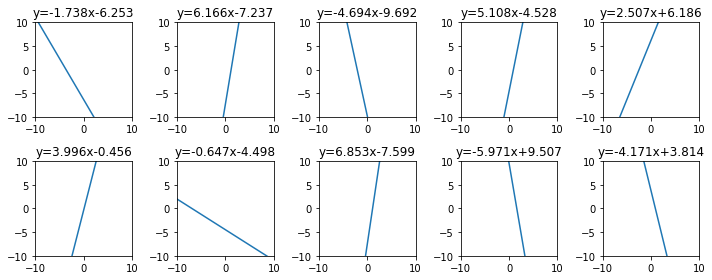

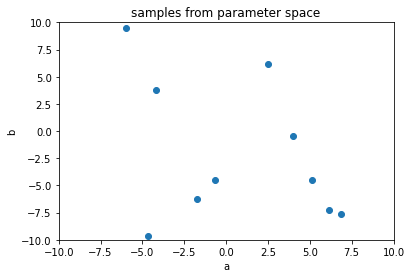

In [9]:
parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlabel('a')
axes2.set_ylabel('b')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

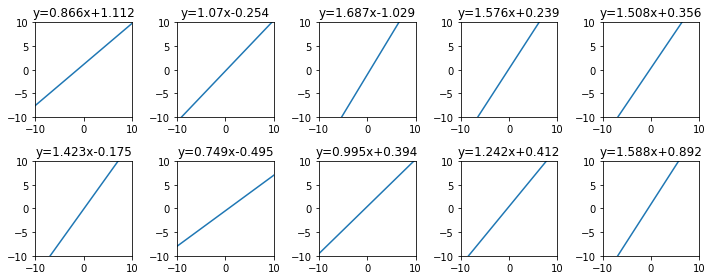

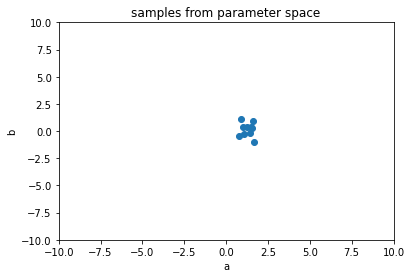

In [4]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlabel('a')
axes2.set_ylabel('b')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## posterior와 prior, likelihood 사이의 관계

[베이지안 머신러닝 모델에서 나온 3가지 단어](https://www.youtube.com/watch?v=HZGCoVF3YvM)


사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)
***

![00](img/00.png)

데이터가 주어졌을 때, p(X) 확률이 나옴

p(X)를 최대한 잘 나타내는 함수를 찾아 내야함!

즉, y = ax + b = $th^Tx$를 찾아야함

prior(사전 확률)

- 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 == p(th)

likelihood(우도)

- 주어진 분포에 대해 얼마나 유사한가? == p(X = x|th)
- 최대 가능도 추정(maximum likelihood estimation, MLE)를 통해 정확도를 높임

posterior(사후 확률)
- 데이터는 유한하기에 목표를 집적 구할 수 없음
- 최대 사후 확률 추정(maximum a posteriori estimation, MAP)를 통해 정확도를 높임

![01](img/01.png)

데이터를 통해 p(X)를 알아내고, likelihood와 prior를 계산하여 posterior를 최대화 하자!

## likelihood와 머신러닝

likelihood == p(Y|th, X)

- 입력 집합 X
- 라벨 집합 Y

하나의 값으로 볼 때 아래와 같음

![02](img/02.png)

## likelihood 감 잡기

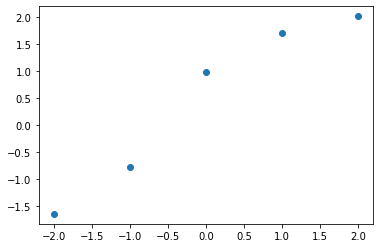

In [10]:
# 데이터 세팅
input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

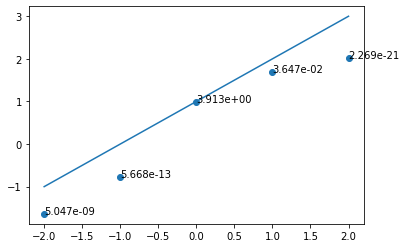

In [12]:
# th
a, b = 1, 1

# 모델 예측값
model_output = a * input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

오차가 클수록 값이 매우 작아짐

## MLE: 최대 가능도 추론

## MLE 최적해 구하기

## MAP: 최대 사후 확률 추정

## MLE와 MAP의 비교

## 회고

## Ref

||||
||||
|20.?.?|[Mathematics for Machine Learning](https://mml-book.github.io/)|전 노드의 출처|